<a href="https://colab.research.google.com/github/NoviantoAryansyah/ML_HOMEWORK/blob/main/HomeWork_Week5/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA example with Iris Data-set_Scikit-Learn**

In [1]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

In [2]:
#from sklearn.datasets import load_iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
#lihat jumlah baris dan kolom dataset
iris.data.shape

(150, 4)

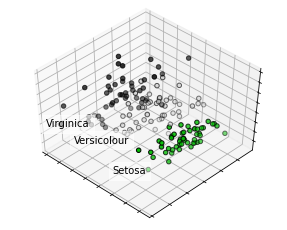

In [4]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

**Comparison of LDA and PCA 2D projection of Iris dataset**

In [5]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Automatically created module for IPython interactive environment


In [6]:
target_names = iris.target_names

In [7]:
#PCA calculation
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

explained variance ratio (first two components): [0.92946326 0.05334452]


Text(0.5, 1.0, 'PCA of IRIS dataset')

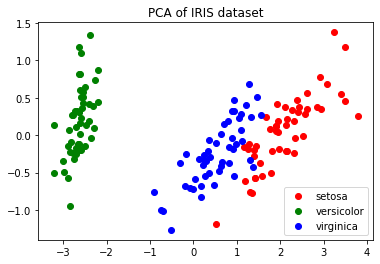

In [8]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

In [9]:
#LDA calculation
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

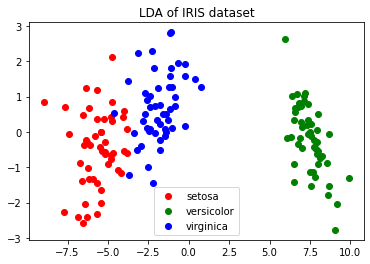

In [10]:
#plotting LDA Iris dataset
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

**SVD (Singular Value Decomposition)**

In [11]:
# Singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A, full_matrices=True)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [12]:
print(U.shape, s.shape, VT.shape)

(3, 3) (2,) (2, 2)


In [13]:
# Reconstruct SVD

from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [14]:
# Pseudoinverse via SVD

from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# define matrix
A = array([
	[0.1, 0.2],
	[0.3, 0.4],
	[0.5, 0.6],
	[0.7, 0.8]])
print(A)
# calculate svd
U, s, VT = svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = zeros(A.shape)
# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = diag(d)
# calculate pseudoinverse
B = VT.T.dot(D.T).dot(U.T)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.42578328e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]
